In [1]:
import numpy as np
import pandas as pd
import warnings
import datetime
warnings.simplefilter('ignore')
import math
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
from sklearn.metrics import mean_squared_error


#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

from sklearn.model_selection import train_test_split
import category_encoders as ce

In [27]:
status = pd.read_csv('../../../status.csv')
#statusのyear, month, dayを結合してdatetime型に
status['date'] = status['year'].astype(str) + '/' + status['month'].astype(str).str.zfill(2).astype(str) + '/' + status['day'].astype(str).str.zfill(2).astype(str) + '/' + status['hour'].astype(str).str.zfill(2).astype(str)
status['date'] = pd.to_datetime(status['date'], format='%Y/%m/%d/%H', infer_datetime_format=True)

#曜日を追加するための関数を定義
def get_weekday_jp(dt):
    w_list = ['月曜日', '火曜日', '水曜日', '木曜日', '金曜日', '土曜日', '日曜日']
    return(w_list[dt.weekday()])

#dateから曜日情報を取得
status["weekday"] = status["date"].apply(get_weekday_jp)

main_df = status[['date','hour', 'station_id', 'bikes_available', 'weekday', 'day']]

#カテゴリ変数をダミー変数化
main_df = pd.get_dummies(main_df)

stationid_set = [0, 15, 32, 36, 38, 40, 43, 49, 54, 56] 

In [14]:
main_df

,date,hour,station_id,bikes_available,day,weekday_土曜日,weekday_日曜日,weekday_月曜日,weekday_木曜日,weekday_水曜日,weekday_火曜日,weekday_金曜日
0,2013-09-01 00:00:00,0,0,11.0,1,0,1,0,0,0,0,0
1,2013-09-01 01:00:00,1,0,11.0,1,0,1,0,0,0,0,0
2,2013-09-01 02:00:00,2,0,11.0,1,0,1,0,0,0,0,0
3,2013-09-01 03:00:00,3,0,11.0,1,0,1,0,0,0,0,0
4,2013-09-01 04:00:00,4,0,11.0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1226395,2015-08-31 19:00:00,19,69,8.0,31,0,0,1,0,0,0,0
1226396,2015-08-31 20:00:00,20,69,8.0,31,0,0,1,0,0,0,0
1226397,2015-08-31 21:00:00,21,69,8.0,31,0,0,1,0,0,0,0
1226398,2015-08-31 22:00:00,22,69,8.0,31,0,0,1,0,0,0,0


(0.0, 25.0)

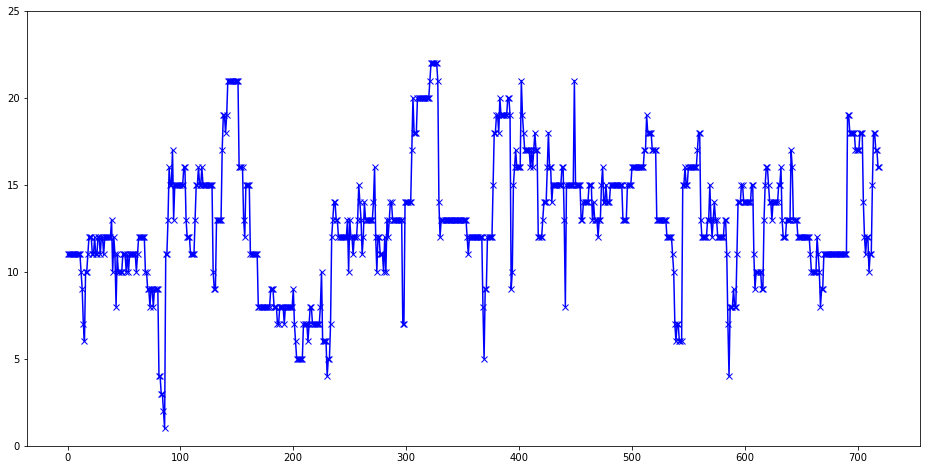

In [24]:
learn_data = main_df[main_df['station_id'] == 0]
learn_data = learn_data[learn_data['date'] < '2013-10-01 00:00:00']
plt.figure(figsize=(16,8))
plt.plot(learn_data['bikes_available'], color = 'blue', marker = 'x')
plt.ylim(0, 25)

(0.0, 25.0)

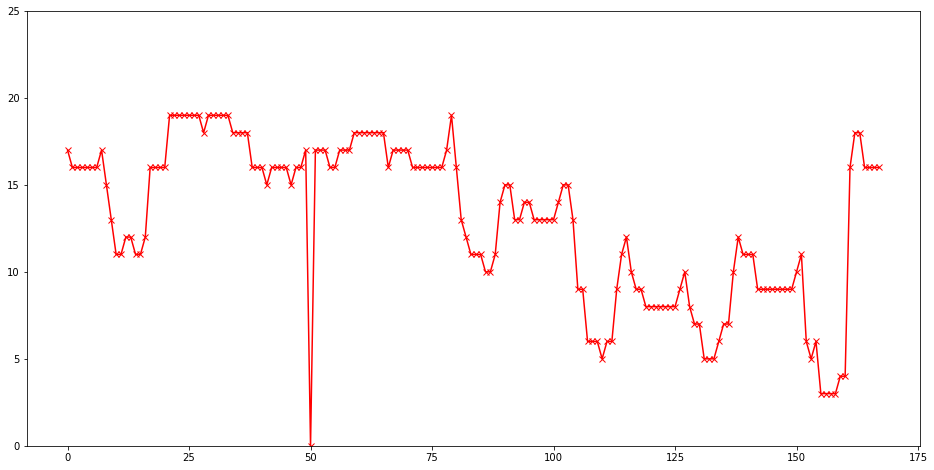

In [25]:
predict_data = main_df[main_df['station_id'] == 0]
predict_data = predict_data[predict_data['date'] >= '2013-11-01 00:00:00']
predict_data = predict_data[predict_data['date'] < '2013-11-08 00:00:00']
plt.figure(figsize=(16,8))
plt.plot(predict_data['bikes_available'].values, color = 'red', marker = 'x')
plt.ylim(0, 25)

In [29]:
#RandomForest_回帰分析
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'Landom_24_predict/nomal/Landom_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))

    filename = 'Landom_24_predict/nomal/Landom_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'Landom_24_predict/nomal/Landom_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("Landom_24_predict/nomal/bias/station_10.csv")

#RandomForest_lagあり
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'Landom_24_predict/Landom_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'Landom_24_predict/Landom_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'Landom_24_predict/Landom_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("Landom_24_predict/bias/station_10.csv")

#XGBoost_回帰分析
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'xgb_24_predict/nomal/xgb_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'xgb_24_predict/nomal/xgb_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'xgb_24_predict/nomal/xgb_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("xgb_24_predict/nomal/bias/station_10.csv")


#XGBoost_lagあり
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'xgb_24_predict/xgb_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'xgb_24_predict/xgb_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))

    filename = 'xgb_24_predict/xgb_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("xgb_24_predict/bias/station_10.csv")


#LightGBM_回帰分析
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'lgb_24_predict/normal/lgb_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'lgb_24_predict/normal/lgb_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'lgb_24_predict/normal/lgb_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("lgb_24_predict/normal/bias/station_10.csv")


#LightGBM_lagあり
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'lgb_24_predict/lgb_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'lgb_24_predict/lgb_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))

    filename = 'lgb_24_predict/lgb_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict_24'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("lgb_24_predict/bias/station_10.csv")


#LSTM
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'lstm_24_predict/lstm_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'lstm_24_predict/lstm_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))

    filename = 'lstm_24_predict/lstm_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    score = abs(dataframe['bikes_available'].mean() - dataframe['predict'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("lstm_24_predict/bias/station_10.csv")



#SARIMAX
rmse_09 = []
rmse_01 = []
rmse_05 = []
for station_id in stationid_set:
    filename = 'Sarimax_24_predict/Sarimax_test_stationid' + str(station_id) + '_201309.csv'
    dataframe = pd.read_csv(filename)
    dataframe_basic = main_df[main_df["station_id"] == station_id]
    dataframe_basic = dataframe_basic[dataframe_basic['date'] >= '2013-10-01']
    dataframe_basic = dataframe_basic[dataframe_basic['date'] < '2013-10-08']
    dataframe_basic['predict'] = dataframe['predicted_mean'][:-1].values
    score = abs(dataframe_basic['bikes_available'].mean() - dataframe_basic['predict'].mean())
    rmse_09.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
    filename = 'Sarimax_24_predict/Sarimax_test_stationid' + str(station_id) + '_201401.csv'
    dataframe = pd.read_csv(filename)
    dataframe_basic = main_df[main_df["station_id"] == station_id]
    dataframe_basic = dataframe_basic[dataframe_basic['date'] >= '2014-02-01']
    dataframe_basic = dataframe_basic[dataframe_basic['date'] < '2014-02-08']
    dataframe_basic['predict'] = dataframe['predicted_mean'][:-1].values
    score = abs(dataframe_basic['bikes_available'].mean() - dataframe_basic['predict'].mean())
    rmse_01.append(round(score, 5 - math.floor(math.log10(score))- 1))

    filename = 'Sarimax_24_predict/Sarimax_test_stationid' + str(station_id) + '_201405.csv'
    dataframe = pd.read_csv(filename)
    dataframe_basic = main_df[main_df["station_id"] == station_id]
    dataframe_basic = dataframe_basic[dataframe_basic['date'] >= '2014-06-01']
    dataframe_basic = dataframe_basic[dataframe_basic['date'] < '2014-06-08']
    dataframe_basic['predict'] = dataframe['predicted_mean'][:-1].values
    score = abs(dataframe_basic['bikes_available'].mean() - dataframe_basic['predict'].mean())
    rmse_05.append(round(score, 5 - math.floor(math.log10(score))- 1))
    
station10 = pd.DataFrame(data=rmse_09)
station10["01"] = rmse_01
station10["05"] = rmse_05
station10.to_csv("Sarimax_24_predict/bias/station_10.csv")

In [62]:
filename ="Sarimax_24_predict/bias/station_10.csv"
dataframe1 = pd.read_csv(filename)
dataframe1

,Unnamed: 0,0,01,05
0,0,0.10741,1.851100,1.159900
1,1,1.36820,1.514800,1.988300
2,2,1.38910,2.282200,0.001323
3,3,0.71452,1.069400,2.500400
4,4,3.31580,2.075600,3.013400
5,5,0.35886,2.922200,0.164570
6,6,1.12390,0.288910,1.204800
7,7,2.07760,1.705200,3.595800
8,8,1.89760,0.056627,1.383200
9,9,0.65013,1.910000,0.743600


In [61]:
filename = "Sarimax_24_predict/bias/station_10.csv"
dataframe1 = pd.read_csv(filename)
dataframe1["05"].values

array([1.1599e+00, 1.9883e+00, 1.3226e-03, 2.5004e+00, 3.0134e+00,
       1.6457e-01, 1.2048e+00, 3.5958e+00, 1.3832e+00, 7.4360e-01])

<AxesSubplot:xlabel='method', ylabel='abs(bias)'>

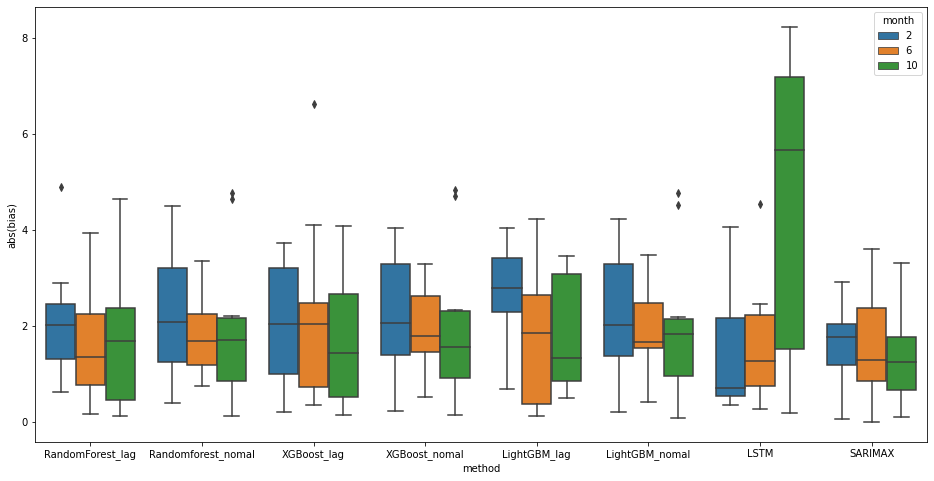

In [67]:
filename = "Hakohige_bias_v0.csv"
dataframe = pd.read_csv(filename)
Figure = plt.figure(figsize=(16,8))
sns.boxplot(x='method', y='abs(bias)', hue='month', data=dataframe)

<AxesSubplot:xlabel='method', ylabel='abs(bias)'>

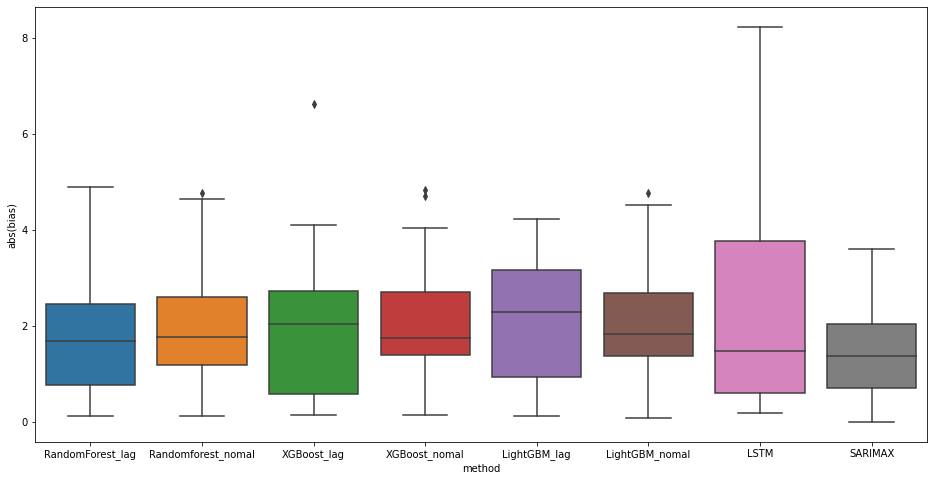

In [78]:
filename = "Hakohige_bias_v0.csv"
dataframe = pd.read_csv(filename)
Figure = plt.figure(figsize=(16,8))
sns.boxplot(x='method', y='abs(bias)', data=dataframe)

In [69]:
filename = "Landom_24_predict/bias/station_10.csv"
dataframe1 = pd.read_csv(filename)

filename = "Landom_24_predict/nomal/bias/station_10.csv"
dataframe2 = pd.read_csv(filename)

filename = "xgb_24_predict/bias/station_10.csv"
dataframe3 = pd.read_csv(filename)

filename = "xgb_24_predict/nomal/bias/station_10.csv"
dataframe4 = pd.read_csv(filename)

filename = "lgb_24_predict/bias/station_10.csv"
dataframe5 = pd.read_csv(filename)

filename = "lgb_24_predict/normal/bias/station_10.csv"
dataframe6 = pd.read_csv(filename)

filename = "lstm_24_predict/bias/station_10.csv"
dataframe7 = pd.read_csv(filename)

filename = "Sarimax_24_predict/bias/station_10.csv"
dataframe8 = pd.read_csv(filename)


date_id_set = ['0', '01', '05']
compare_8 = []
result_8 = []
j = 0
for date_id in date_id_set:
    i = 0
    while i < 10:
        compare_8.append(dataframe1[date_id].values[i])
        compare_8.append(dataframe2[date_id].values[i])
        compare_8.append(dataframe3[date_id].values[i])
        compare_8.append(dataframe4[date_id].values[i])
        compare_8.append(dataframe5[date_id].values[i])
        compare_8.append(dataframe6[date_id].values[i])
        compare_8.append(dataframe7[date_id].values[i])
        compare_8.append(dataframe8[date_id].values[i])       
        result_8.append(np.argmin(compare_8)+1)
        compare_8 = []
        i += 1
    if(j==0):
        rmse_compare = pd.DataFrame(data=result_8)
        j += 1
    elif(j==1):
        rmse_compare["01"] = result_8
        j += 1
    else:
        rmse_compare["05"] = result_8
    result_8 = []

rmse_compare.to_csv("bias_compare8.csv")
rmse_compare

,0,01,05
0,8,7,1
1,3,7,7
2,1,7,8
3,1,4,1
4,4,7,7
5,8,3,5
6,8,8,8
7,6,1,5
8,1,8,1
9,8,1,8


In [70]:
filename = "Landom_24_predict/bias/station_10.csv"
dataframe1 = pd.read_csv(filename)
dataframe1.sum()

Unnamed: 0    45.00000
0             16.54339
01            21.13076
05            16.36939
dtype: float64

In [71]:
filename = "Landom_24_predict/nomal/bias/station_10.csv"
dataframe1 = pd.read_csv(filename)
dataframe1.sum()

Unnamed: 0    45.00000
0             19.72924
01            21.69453
05            17.82139
dtype: float64

In [72]:
filename = "xgb_24_predict/bias/station_10.csv"
dataframe1 = pd.read_csv(filename)
dataframe1.sum()

Unnamed: 0    45.00000
0             16.53644
01            20.45980
05            22.08267
dtype: float64

In [73]:
filename = "xgb_24_predict/nomal/bias/station_10.csv"
dataframe1 = pd.read_csv(filename)
dataframe1.sum()

Unnamed: 0    45.00000
0             19.82251
01            21.40910
05            19.21413
dtype: float64

In [74]:
filename = "lgb_24_predict/bias/station_10.csv"
dataframe5 = pd.read_csv(filename)
dataframe5.sum()

Unnamed: 0    45.00000
0             18.33361
01            26.44932
05            18.54548
dtype: float64

In [75]:
filename = "lgb_24_predict/normal/bias/station_10.csv"
dataframe6 = pd.read_csv(filename)
dataframe6.sum()

Unnamed: 0    45.000000
0             19.824498
01            21.716160
05            18.845390
dtype: float64

In [76]:
filename = "lstm_24_predict/bias/station_10.csv"
dataframe7 = pd.read_csv(filename)
dataframe7.sum()

Unnamed: 0    45.00000
0             45.69363
01            13.90818
05            16.01099
dtype: float64

In [77]:
filename = "Sarimax_24_predict/bias/station_10.csv"
dataframe8 = pd.read_csv(filename)
dataframe8.sum()

Unnamed: 0    45.000000
0             13.003120
01            15.676037
05            15.755293
dtype: float64

In [2]:
filename = "Landom_24_predict/station_10.csv"
dataframe1 = pd.read_csv(filename)

filename = "Landom_24_predict/nomal/station_10.csv"
dataframe2 = pd.read_csv(filename)

filename = "xgb_24_predict/station_10.csv"
dataframe3 = pd.read_csv(filename)

filename = "xgb_24_predict/nomal/station_10.csv"
dataframe4 = pd.read_csv(filename)

filename = "lgb_24_predict/station_10.csv"
dataframe5 = pd.read_csv(filename)

filename = "lgb_24_predict/normal/station_10.csv"
dataframe6 = pd.read_csv(filename)

filename = "lstm_24_predict/station_10.csv"
dataframe7 = pd.read_csv(filename)

filename = "Sarimax_24_predict/station_10.csv"
dataframe8 = pd.read_csv(filename)


date_id_set = ['0', '01', '05']
compare_8 = []
result_8 = []
j = 0
for date_id in date_id_set:
    i = 0
    while i < 10:
        compare_8.append(dataframe1[date_id].values[i])
        compare_8.append(dataframe2[date_id].values[i])
        compare_8.append(dataframe3[date_id].values[i])
        compare_8.append(dataframe4[date_id].values[i])
        compare_8.append(dataframe5[date_id].values[i])
        compare_8.append(dataframe6[date_id].values[i])
        compare_8.append(dataframe7[date_id].values[i])
        compare_8.append(dataframe8[date_id].values[i])       
        A = np.array(compare_8)
        result_8.append(A.argsort()[1]+1)
        compare_8 = []
        i += 1
    if(j==0):
        rmse_compare = pd.DataFrame(data=result_8)
        j += 1
    elif(j==1):
        rmse_compare["01"] = result_8
        j += 1
    else:
        rmse_compare["05"] = result_8
    result_8 = []

rmse_compare.to_csv("rmse_compare8_no2.csv")
rmse_compare

,0,01,05
0,5,7,1
1,8,8,8
2,3,2,7
3,8,8,6
4,2,7,1
5,1,5,8
6,1,5,3
7,8,8,3
8,1,8,1
9,5,8,5


In [3]:
filename = "Landom_24_predict/station_10.csv"
dataframe1 = pd.read_csv(filename)

filename = "Landom_24_predict/nomal/station_10.csv"
dataframe2 = pd.read_csv(filename)

filename = "xgb_24_predict/station_10.csv"
dataframe3 = pd.read_csv(filename)

filename = "xgb_24_predict/nomal/station_10.csv"
dataframe4 = pd.read_csv(filename)

filename = "lgb_24_predict/station_10.csv"
dataframe5 = pd.read_csv(filename)

filename = "lgb_24_predict/normal/station_10.csv"
dataframe6 = pd.read_csv(filename)

filename = "lstm_24_predict/station_10.csv"
dataframe7 = pd.read_csv(filename)

filename = "Sarimax_24_predict/station_10.csv"
dataframe8 = pd.read_csv(filename)


date_id_set = ['0', '01', '05']
compare_8 = []
result_8 = []
j = 0
for date_id in date_id_set:
    i = 0
    while i < 10:
        compare_8.append(dataframe1[date_id].values[i])
        compare_8.append(dataframe2[date_id].values[i])
        compare_8.append(dataframe3[date_id].values[i])
        compare_8.append(dataframe4[date_id].values[i])
        compare_8.append(dataframe5[date_id].values[i])
        compare_8.append(dataframe6[date_id].values[i])
        compare_8.append(dataframe7[date_id].values[i])
        compare_8.append(dataframe8[date_id].values[i])       
        A = np.array(compare_8)
        result_8.append(A.argsort()[2]+1)
        compare_8 = []
        i += 1
    if(j==0):
        rmse_compare = pd.DataFrame(data=result_8)
        j += 1
    elif(j==1):
        rmse_compare["01"] = result_8
        j += 1
    else:
        rmse_compare["05"] = result_8
    result_8 = []

rmse_compare.to_csv("rmse_compare8_no3.csv")
rmse_compare

,0,01,05
0,2,1,8
1,3,1,3
2,8,4,8
3,2,2,2
4,3,3,8
5,2,6,4
6,5,3,1
7,1,5,5
8,5,6,5
9,3,2,6


In [4]:
filename = "Landom_24_predict/station_10.csv"
dataframe1 = pd.read_csv(filename)

filename = "Landom_24_predict/nomal/station_10.csv"
dataframe2 = pd.read_csv(filename)

filename = "xgb_24_predict/station_10.csv"
dataframe3 = pd.read_csv(filename)

filename = "xgb_24_predict/nomal/station_10.csv"
dataframe4 = pd.read_csv(filename)

filename = "lgb_24_predict/station_10.csv"
dataframe5 = pd.read_csv(filename)

filename = "lgb_24_predict/normal/station_10.csv"
dataframe6 = pd.read_csv(filename)

filename = "lstm_24_predict/station_10.csv"
dataframe7 = pd.read_csv(filename)

filename = "Sarimax_24_predict/station_10.csv"
dataframe8 = pd.read_csv(filename)


date_id_set = ['0', '01', '05']
compare_8 = []
result_8 = []
j = 0
for date_id in date_id_set:
    i = 0
    while i < 10:
        compare_8.append(dataframe1[date_id].values[i])
        compare_8.append(dataframe2[date_id].values[i])
        compare_8.append(dataframe3[date_id].values[i])
        compare_8.append(dataframe4[date_id].values[i])
        compare_8.append(dataframe5[date_id].values[i])
        compare_8.append(dataframe6[date_id].values[i])
        compare_8.append(dataframe7[date_id].values[i])
        compare_8.append(dataframe8[date_id].values[i])       
        A = np.array(compare_8)
        result_8.append(A.argsort()[0]+1)
        compare_8 = []
        i += 1
    if(j==0):
        rmse_compare = pd.DataFrame(data=result_8)
        j += 1
    elif(j==1):
        rmse_compare["01"] = result_8
        j += 1
    else:
        rmse_compare["05"] = result_8
    result_8 = []

#rmse_compare.to_csv("rmse_compare8_no3.csv")
rmse_compare

,0,01,05
0,8,8,5
1,1,7,7
2,1,7,2
3,1,7,4
4,1,1,7
5,8,2,6
6,8,8,8
7,7,1,1
8,8,3,8
9,8,1,8
